##### Algoritm: K-nearest neighbors

K-nearest neighbors algorithm is simple, we simply detemine the nearest k-neigbors in the input space of  x via the eucledian metric 
$$||x-y||=\sqrt{\sum_{i=1} (x_i-y_i)^2 }$$


to find the neighborhood $Y(k)$. 

$$\hat Y= \sum^{}_{X\in Y(k)}$$

If we then want to classify the point x to a binary class $G$ we can formulate a bayesian clasifier $argsmax (g_1, g_2)$ or using a dummy using a dummy variable 
$\begin{cases}
    1& |\ \bar Y >0.5\\
    0& |\ \bar Y \le 0.5  
\end{cases}$

This can be shown to align with a more general framwork of aproximating a conditional expected value $E[Y | X=x]$, ergo aproximating the expected value via averaging.





##### Generating some points to classify

In [2]:
import numpy as np
import matplotlib.pyplot as plt


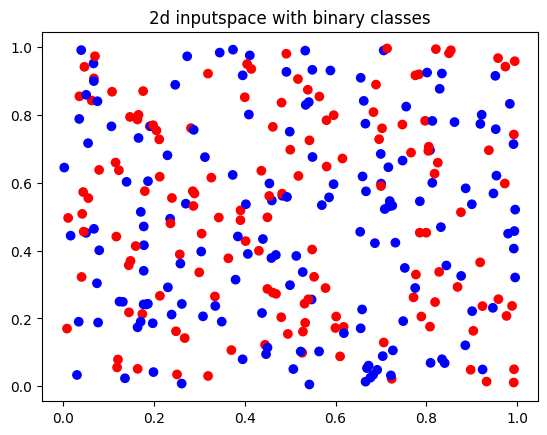

In [4]:
length=300
X_x=np.random.rand(length,1)
X_y=np.random.rand(length,1)
Y=np.random.randint(0, 2, size=(length,1))
plt.scatter(X_y,X_x, c=Y, cmap='bwr')
plt.title("2d inputspace with binary classes")
plt.show()

###### Each (x,y)-coordinate represents inputs and each color represents classes 

##### Defining function that takes the mean of k-nearest neigbors

In [5]:
def K_neighbor_mean(x,y,x_cord, y_cord, Y, K):

    Eucl_dist = (x-x_cord)**2+(y-y_cord)**2
      
    return np.mean(Y[np.argsort(Eucl_dist.ravel())][:K])

##### We can now showcase how the classification rule asigns classes to each coordinate

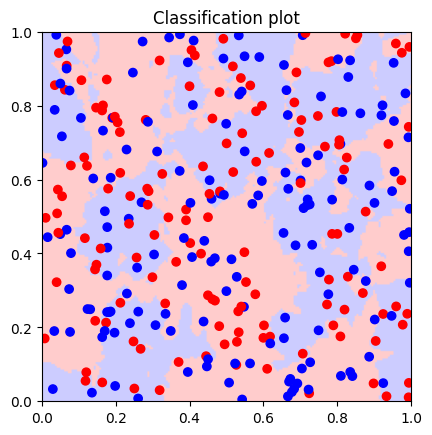

In [9]:
xs = np.linspace(0, 1, 200)
ys = np.linspace(0, 1, 200)
Z = np.zeros((len(ys), len(xs)))


for i, y in enumerate(ys):
    for j, x in enumerate(xs):
        Z[i, j] = K_neighbor_mean(x,y,X_x, X_y, Y, 7)<0.5


plt.imshow(Z,extent=(0,1,0,1),cmap='bwr',alpha=0.2)
plt.scatter(X_y,X_x, c=Y, cmap='bwr')
plt.title("Classification plot")
plt.show()

##### Let's also examine the mean square error 


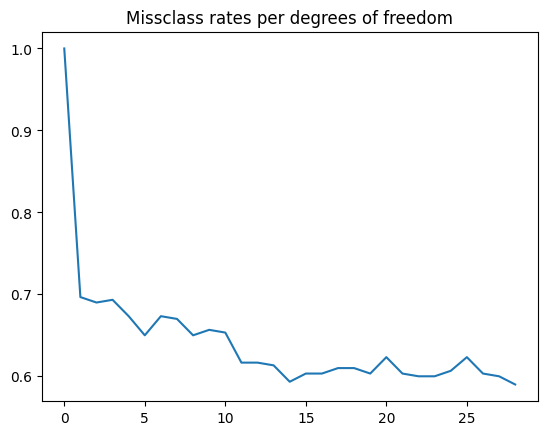

In [10]:

sums=[]
for k in range(1,30):
    k_sum=0
    for i in range(len(Y)):
        k_sum+=(Y[i]-int(K_neighbor_mean(X_x[i],X_y[i],X_x, X_y, Y, k)<0.5))**2
    sums.append(k_sum/len(Y))
    
    
plt.plot(sums)
plt.title("Missclass rates per degrees of freedom")
plt.show()